In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Read csv
df = pd.read_csv('/Users/rakshith/employee_reviews.csv')

df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  67529 non-null  int64 
 1   company                     67529 non-null  object
 2   location                    67529 non-null  object
 3   dates                       67529 non-null  object
 4   job-title                   67529 non-null  object
 5   summary                     67409 non-null  object
 6   pros                        67529 non-null  object
 7   cons                        67529 non-null  object
 8   advice-to-mgmt              67232 non-null  object
 9   overall-ratings             67529 non-null  int64 
 10  work-balance-stars          67529 non-null  object
 11  culture-values-stars        67529 non-null  object
 12  carrer-opportunities-stars  67529 non-null  object
 13  comp-benefit-stars          67529 non-null  ob

In [4]:
#Dropping unwanted columns for EDA
df.drop(columns= ['Unnamed: 0', 'link', 'helpful-count'], inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   company                     67529 non-null  object
 1   location                    67529 non-null  object
 2   dates                       67529 non-null  object
 3   job-title                   67529 non-null  object
 4   summary                     67409 non-null  object
 5   pros                        67529 non-null  object
 6   cons                        67529 non-null  object
 7   advice-to-mgmt              67232 non-null  object
 8   overall-ratings             67529 non-null  int64 
 9   work-balance-stars          67529 non-null  object
 10  culture-values-stars        67529 non-null  object
 11  carrer-opportunities-stars  67529 non-null  object
 12  comp-benefit-stars          67529 non-null  object
 13  senior-mangemnet-stars      67529 non-null  ob

In [5]:
#Check for null
df.isna().sum()

company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
dtype: int64

In [6]:
#Replaced rows with null for summary and advice to management with empty space.
df.fillna(value= "", inplace= True)

df.isna().sum()

company                       0
location                      0
dates                         0
job-title                     0
summary                       0
pros                          0
cons                          0
advice-to-mgmt                0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
dtype: int64

In [7]:
df.duplicated().sum()

969

In [8]:
df.drop_duplicates()

df.shape

(67529, 14)

In [9]:
#Location value counts
df.location.value_counts()

none                                 25085
Redmond, WA                           5613
Seattle, WA                           4963
Hyderabad (India)                     2150
Mountain View, CA                     1706
                                     ...  
Tarlac, Tarlac (Philippines)             1
De Land, FL                              1
Saint-Ghislain, Hainaut (Belgium)        1
Granite City, IL                         1
Bainbridge Island, WA                    1
Name: location, Length: 2044, dtype: int64

In [10]:
#Overall ratings values counts
df['overall-ratings'].value_counts()

5    23190
4    22498
3    12653
2     5282
1     3906
Name: overall-ratings, dtype: int64

In [11]:
# Work balance stars
df['work-balance-stars'].value_counts()

4       15167
5       14205
3       13914
2        7898
none     7160
1        7057
3.5       785
4.5       711
2.5       457
1.5       175
Name: work-balance-stars, dtype: int64

In [12]:
# Culture value stars
df['culture-values-stars'].value_counts()

5       21536
4       13685
none    13546
3        9192
1        4840
2        4730
Name: culture-values-stars, dtype: int64

In [13]:
# Career opportunities stars
df['carrer-opportunities-stars'].value_counts()

5       18163
4       16673
3       13257
none     7108
2        6171
1        4535
3.5       711
2.5       395
4.5       389
1.5       127
Name: carrer-opportunities-stars, dtype: int64

In [14]:
df['comp-benefit-stars'].value_counts()

5       21224
4       19854
3       11437
none     7161
2        3465
1        1902
4.5      1095
3.5       971
2.5       366
1.5        54
Name: comp-benefit-stars, dtype: int64

In [15]:
#Dropping by least values first for none

#condition career opportunities stars is none
conditionCareerOpportunities = df['carrer-opportunities-stars'] != 'none'

df = df[conditionCareerOpportunities]

df['carrer-opportunities-stars'].value_counts()


5      18163
4      16673
3      13257
2       6171
1       4535
3.5      711
2.5      395
4.5      389
1.5      127
Name: carrer-opportunities-stars, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60421 entries, 0 to 67528
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   company                     60421 non-null  object
 1   location                    60421 non-null  object
 2   dates                       60421 non-null  object
 3   job-title                   60421 non-null  object
 4   summary                     60421 non-null  object
 5   pros                        60421 non-null  object
 6   cons                        60421 non-null  object
 7   advice-to-mgmt              60421 non-null  object
 8   overall-ratings             60421 non-null  int64 
 9   work-balance-stars          60421 non-null  object
 10  culture-values-stars        60421 non-null  object
 11  carrer-opportunities-stars  60421 non-null  object
 12  comp-benefit-stars          60421 non-null  object
 13  senior-mangemnet-stars      60421 non-null  ob

In [17]:
def displayValueCounts(listOfColumns):
    for columnName in listOfColumns:
        print(columnName)
        print(df[columnName].value_counts())


displayValueCounts([
    'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars',
    'comp-benefit-stars', 'senior-mangemnet-stars'
])

work-balance-stars
4       15089
5       14130
3       13835
2        7852
1        7015
3.5       785
4.5       711
2.5       457
none      372
1.5       175
Name: work-balance-stars, dtype: int64
culture-values-stars
5       21437
4       13625
3        9133
none     6724
1        4799
2        4703
Name: culture-values-stars, dtype: int64
carrer-opportunities-stars
5      18163
4      16673
3      13257
2       6171
1       4535
3.5      711
2.5      395
4.5      389
1.5      127
Name: carrer-opportunities-stars, dtype: int64
comp-benefit-stars
5       21123
4       19751
3       11380
2        3450
1        1885
4.5      1095
3.5       971
2.5       366
none      346
1.5        54
Name: comp-benefit-stars, dtype: int64
senior-mangemnet-stars
4       15787
3       13660
5       13260
2        7944
1        7674
none      890
3.5       410
2.5       316
4.5       303
1.5       177
Name: senior-mangemnet-stars, dtype: int64


In [18]:
#Removing value of comp-benefit-stars with none

conditionCompBenefits = df['comp-benefit-stars'] != 'none'

df = df[conditionCompBenefits]

In [19]:
displayValueCounts([
    'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars',
    'comp-benefit-stars', 'senior-mangemnet-stars'
])

df.shape

work-balance-stars
4       15067
5       14103
3       13812
2        7841
1        6994
3.5       785
4.5       711
2.5       457
1.5       175
none      130
Name: work-balance-stars, dtype: int64
culture-values-stars
5       21402
4       13602
3        9124
none     6475
1        4776
2        4696
Name: culture-values-stars, dtype: int64
carrer-opportunities-stars
5      18036
4      16597
3      13187
2       6140
1       4493
3.5      711
2.5      395
4.5      389
1.5      127
Name: carrer-opportunities-stars, dtype: int64
comp-benefit-stars
5      21123
4      19751
3      11380
2       3450
1       1885
4.5     1095
3.5      971
2.5      366
1.5       54
Name: comp-benefit-stars, dtype: int64
senior-mangemnet-stars
4       15769
3       13649
5       13240
2        7937
1        7655
none      619
3.5       410
2.5       316
4.5       303
1.5       177
Name: senior-mangemnet-stars, dtype: int64


(60075, 14)

In [20]:
# Removing values of work-balance-stars having none

conditionWorkBalance = df['work-balance-stars'] != 'none'

df = df[conditionWorkBalance]

In [21]:
displayValueCounts([
    'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars',
    'comp-benefit-stars', 'senior-mangemnet-stars'
])

df.shape

work-balance-stars
4      15067
5      14103
3      13812
2       7841
1       6994
3.5      785
4.5      711
2.5      457
1.5      175
Name: work-balance-stars, dtype: int64
culture-values-stars
5       21383
4       13591
3        9113
none     6402
1        4767
2        4689
Name: culture-values-stars, dtype: int64
carrer-opportunities-stars
5      17999
4      16574
3      13155
2       6124
1       4471
3.5      711
2.5      395
4.5      389
1.5      127
Name: carrer-opportunities-stars, dtype: int64
comp-benefit-stars
5      21083
4      19715
3      11354
2       3439
1       1868
4.5     1095
3.5      971
2.5      366
1.5       54
Name: comp-benefit-stars, dtype: int64
senior-mangemnet-stars
4       15762
3       13640
5       13230
2        7929
1        7648
none      530
3.5       410
2.5       316
4.5       303
1.5       177
Name: senior-mangemnet-stars, dtype: int64


(59945, 14)

In [22]:
# Removing value of senior-mangemnet-stars having none

conditionSeniorManagement = df['senior-mangemnet-stars'] != 'none'

df = df[conditionSeniorManagement]

In [23]:
displayValueCounts([
    'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars',
    'comp-benefit-stars', 'senior-mangemnet-stars'
])

df.shape

work-balance-stars
4      14925
5      13987
3      13676
2       7768
1       6931
3.5      785
4.5      711
2.5      457
1.5      175
Name: work-balance-stars, dtype: int64
culture-values-stars
5       21241
4       13511
3        9061
none     6193
1        4749
2        4660
Name: culture-values-stars, dtype: int64
carrer-opportunities-stars
5      17836
4      16414
3      13046
2       6071
1       4426
3.5      711
2.5      395
4.5      389
1.5      127
Name: carrer-opportunities-stars, dtype: int64
comp-benefit-stars
5      20887
4      19565
3      11239
2       3389
1       1849
4.5     1095
3.5      971
2.5      366
1.5       54
Name: comp-benefit-stars, dtype: int64
senior-mangemnet-stars
4      15762
3      13640
5      13230
2       7929
1       7648
3.5      410
2.5      316
4.5      303
1.5      177
Name: senior-mangemnet-stars, dtype: int64


(59415, 14)

In [24]:
#Decide if we need to eliminate culture-values-stars of nearly 6000 records

#For now deleting such records

conditionCultureValue = df['culture-values-stars'] != 'none'

df = df[conditionCultureValue]

In [25]:
displayValueCounts([
    'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars',
    'comp-benefit-stars', 'senior-mangemnet-stars'
])

df.shape

work-balance-stars
4    13632
3    12818
5    12727
2     7423
1     6622
Name: work-balance-stars, dtype: int64
culture-values-stars
5    21241
4    13511
3     9061
1     4749
2     4660
Name: culture-values-stars, dtype: int64
carrer-opportunities-stars
5    16891
4    15034
3    11827
2     5443
1     4027
Name: carrer-opportunities-stars, dtype: int64
comp-benefit-stars
5    19870
4    18118
3    10271
2     3196
1     1767
Name: comp-benefit-stars, dtype: int64
senior-mangemnet-stars
4    14407
3    12430
5    12203
2     7197
1     6985
Name: senior-mangemnet-stars, dtype: int64


(53222, 14)

In [26]:
# Creating new features 

In [27]:
df.dates.value_counts()

 Sep 19, 2017    260
 Sep 18, 2017    103
 Aug 29, 2018     91
 Sep 22, 2017     86
 Sep 25, 2017     84
                ... 
 Dec 9, 2013       1
None               1
 Nov 0, 0000       1
 Nov 28, 2014      1
 Dec 2, 2012       1
Name: dates, Length: 2397, dtype: int64

In [28]:
#Extracting year

#One value in dates is None, removing that

conditionDateNone = df['dates'] != 'None'

df = df[conditionDateNone]

def getYearFrom(date):
    splitString = date.split(",")
    year = splitString[1]
    return year

def getMonthFrom(date):
    splitString = date.split(",")
    splitStringMonth = splitString[0].split(" ")
    return splitStringMonth[1]

df["Year"] = df["dates"].apply(lambda x: getYearFrom(x))
df["Month"] = df["dates"].apply(lambda x: getMonthFrom(x))

df.head(1)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,Year,Month
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,2018,Dec


In [29]:

#Extracting current of former employee
def getEmployeeType(designation):
    splitString = designation.split("-")
    return splitString[0]

df["EmployeeType"] = df["job-title"].apply(lambda x: getEmployeeType(x))

df.head(2)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,Year,Month,EmployeeType
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,2018,Dec,Current Employee
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2013,Jun,Former Employee


In [30]:
#Checking for designation

def checkRoleForHR(position):
    humanResources = ["hr", "human", "human resources"]
    for item in humanResources:
        if item in position.lower():
            return 1
    
    return 0
 
def checkRoleForRecuiter(position):
    talentAcquisition = ["talent", "hiring", "acquisition", "recruiter"]
    for item in talentAcquisition:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForLead(position):
    lead = ["lead"]
    for item in lead:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForSenior(position):
    senior = ["senior"]
    for item in senior:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForManager(position):
    lead = ["manager"]
    for item in lead:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForIntern(position):
    intern = ["intern", "assistant", "trainee", "train"]
    for item in intern:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForDeveloper(position):
    developer = ["developer", "software"]
    for item in developer:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForSales(position):
    sales = ["sales"]
    for item in sales:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForMarketing(position):
    marketing = ["marketing"]
    for item in marketing:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForFinance(position):
    finance = ["financ"]
    for item in finance:
        if item in position.lower():
            return 1
    
    return 0

def checkRoleForAnalyst(position):
    analyst = ["analyst", "analysis"]
    for item in analyst:
        if item in position.lower():
            return 1
    
    return 0

df["FunctionHR"] = df["job-title"].apply(
   lambda x: checkRoleForHR(x))

df["FunctionRecruiter"] = df["job-title"].apply(
   lambda x: checkRoleForRecuiter(x))

df["FunctionSDevelopment"] = df["job-title"].apply(
   lambda x: checkRoleForDeveloper(x))

df["FunctionFinance"] = df["job-title"].apply(
   lambda x: checkRoleForFinance(x))

df["FunctionMarketing"] = df["job-title"].apply(
   lambda x: checkRoleForMarketing(x))

df["FunctionAnalyst"] = df["job-title"].apply(
   lambda x: checkRoleForAnalyst(x))

#Roles

df["RoleLead"] = df["job-title"].apply(
   lambda x: checkRoleForLead(x))

df["RoleSenior"] = df["job-title"].apply(
   lambda x: checkRoleForSenior(x))

df["RoleManager"] = df["job-title"].apply(
   lambda x: checkRoleForManager(x))

df["RoleIntern"] = df["job-title"].apply(
   lambda x: checkRoleForIntern(x))

df.head(3)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,...,FunctionHR,FunctionRecruiter,FunctionSDevelopment,FunctionFinance,FunctionMarketing,FunctionAnalyst,RoleLead,RoleSenior,RoleManager,RoleIntern
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,...,0,0,0,0,0,0,0,0,0,0
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,...,0,0,0,0,0,0,0,0,1,0
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,...,0,0,1,0,0,0,0,0,0,0


In [31]:
df.company.value_counts()

amazon       22079
microsoft    13358
apple        10248
google        5604
facebook      1438
netflix        494
Name: company, dtype: int64

In [32]:
#Removing all reviews from Netflix, as we have less reviews compared to others.

conditionCompanyNetflix = df['company'] != 'netflix'

df = df[conditionCompanyNetflix]

df.company.value_counts()

amazon       22079
microsoft    13358
apple        10248
google        5604
facebook      1438
Name: company, dtype: int64

In [33]:
#Removing rows which have Year as 0000

# conditionYearZero = df['Year'] != 0

# df = df[conditionYearZero]

# df.Year.value_counts()

#df.to_csv(r'/Users/rakshith/employee_reviews_cleaned.csv')



In [34]:
dataFrameReviews = pd.read_csv('/Users/rakshith/employee_reviews_cleaned.csv')

companyWiseNumOfReviews = dataFrameReviews.company.value_counts()
#companyWiseNumOfReviews.rename(columns= {"dates": "num_of_reviews"}, inplace = True)

companyWiseNumOfReviews


amazon       22078
microsoft    13358
apple        10247
google        5604
facebook      1438
Name: company, dtype: int64

In [130]:
dataFrameReviews.shape

(52725, 28)

In [35]:
def configureGraph(axis,
                   plot,
                   xLabelTitle,
                   xLabelSize,
                   yLabelTitle,
                   yLabelSize,
                   showGrid,
                   graphTitle,
                   titleSize=20):
    try:
        configureGraphForNonFacets(axis, xLabelTitle, xLabelSize, yLabelTitle,
                                   yLabelSize, graphTitle, titleSize)
    except AttributeError:
        configureGraphForFacets(axis, plot, xLabelTitle, xLabelSize,
                                yLabelTitle, yLabelSize, graphTitle, titleSize)
    if showGrid:
        plot.grid()


def configureGraphForNonFacets(axis,
                               xLabelTitle,
                               xLabelSize,
                               yLabelTitle,
                               yLabelSize,
                               graphTitle,
                               titleSize=20):
    axis.set_title(graphTitle, size=titleSize, weight='bold')
    axis.set_xlabel(xLabelTitle, size=xLabelSize)
    axis.set_ylabel(yLabelTitle, size=yLabelSize)


def configureGraphForFacets(axis,
                            plot,
                            xLabelTitle,
                            xLabelSize,
                            yLabelTitle,
                            yLabelSize,
                            graphTitle,
                            titleSize=20):
    axis.set_axis_labels(x_var=xLabelTitle,
                         y_var=yLabelTitle,
                         fontsize=xLabelSize)
    if graphTitle != "":
        plot.title(graphTitle, fontsize=titleSize)

Int64Index([0, 4, 1, 3, 2], dtype='int64')
[['amazon' 22078]
 ['microsoft' 13358]
 ['apple' 10247]
 ['google' 5604]
 ['facebook' 1438]]


ValueError: could not convert string to float: 'amazon'

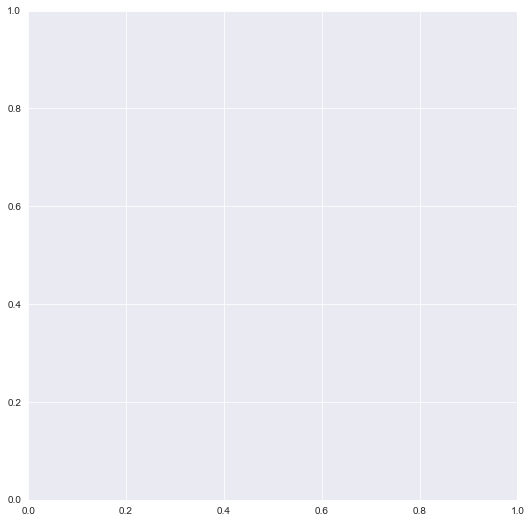

In [150]:
#Graph for number of reviews.
#Plotting both pie chart and bar chart to later decide which one is better.

names = ["Amazon", "Microsoft", "Apple", "Google", "Facebook"]
namesCorrect = companyWiseNumOfReviews.index
print(namesCorrect)
colors = sns.color_palette('pastel')[0:5]
values =  companyWiseNumOfReviews.values

print(values)
#create a pie chart
plt.pie(values,
        labels=names,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.8,
        textprops=dict(fontweight='bold', fontsize=16),
        wedgeprops={
            'linewidth': 1,
            'edgecolor': 'white'
        })

#convert it to a donut chart with a circle at the centre
circ = plt.Circle((0, 0), 0.6, color='white')

fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.gca().add_artist(circ)
plt.title('\nProportion of reviews per company',
          fontsize=17,
          fontweight='bold')

plt.show()

In [149]:
#Bar grapgh
companyWiseNumOfReviews = dataFrameReviews.groupby("company")["dates"].count().reset_index()

companyWiseNumOfReviews.rename(columns= {"dates": "num_of_reviews"}, inplace = True)

companyWiseNumOfReviews.sort_values(by= "num_of_reviews", ascending= False, inplace= True)

companyWiseNumOfReviews

,company,num_of_reviews
0,amazon,22078
4,microsoft,13358
1,apple,10247
3,google,5604
2,facebook,1438


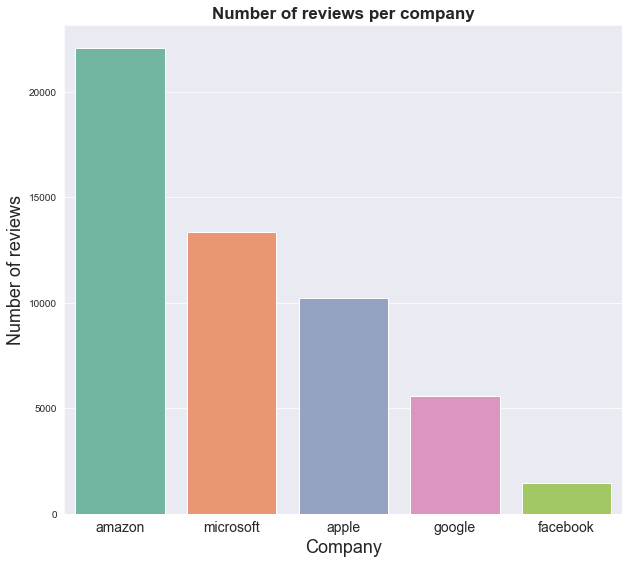

In [146]:
graphNumberOfReviewsPerCompany = sns.barplot(
    x="company",
    y = "num_of_reviews",
    data=companyWiseNumOfReviews,
    ci=None,
    palette="Set2")

configureGraph(graphNumberOfReviewsPerCompany, plt, "Company", 18, "Number of reviews", 18, False,
               "Number of reviews per company", 17)

plt.rcParams['figure.figsize'] = (10,9)

plt.xticks(fontsize=14)

plt.show()

               index      0
0   Former Employee   19433
1  Current Employee   33292


(array([0, 1]),
 [Text(0, 0, 'Former Employee '), Text(1, 0, 'Current Employee ')])

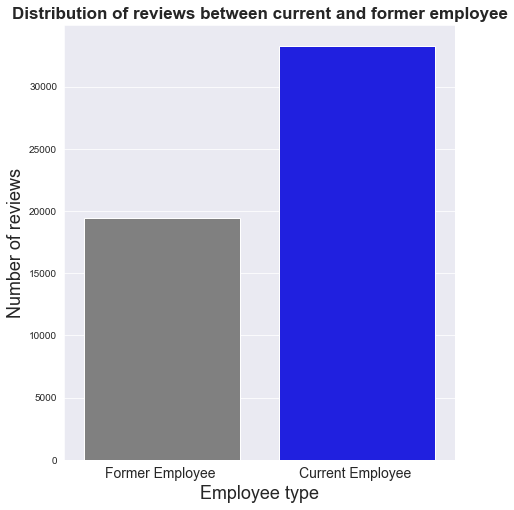

In [39]:
#Number of current vs former employee reviews

current_employee_count = dataFrameReviews['job-title'].str.split(
    '-', expand=True)[0].value_counts().sort_values(ascending=True)

print(current_employee_count.reset_index())
employee_labels = current_employee_count.index.tolist()
employee_index = np.arange(len(employee_labels))

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (7, 8)

graphCurrentAndFormerEmployee = sns.barplot(x=employee_labels,
                                            y=current_employee_count,
                                            palette=["gray", "b"])

configureGraph(graphCurrentAndFormerEmployee, plt, "Employee type", 18, "Number of reviews", 18, False,
               "Distribution of reviews between current and former employee", 17)

plt.xticks(fontsize=14)

# plt.xticks(employee_index, employee_labels)

# plt.xlabel('Types of Employee')

# plt.ylabel('Number of Reviews')

# plt.title(
#     'Distribution of Reviews by type of employee (Current vs Former)')

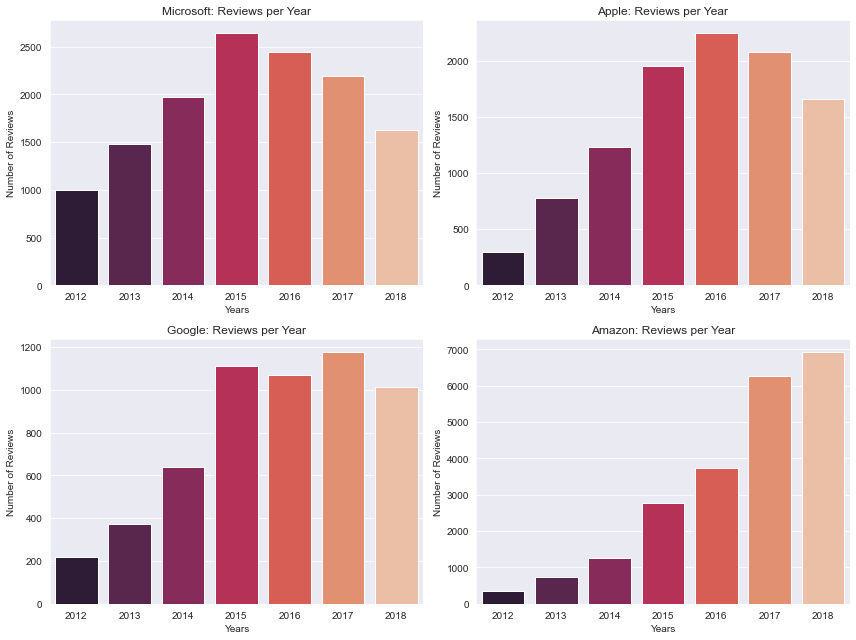

In [40]:
#Number of reviews per year for each company

fig, axs = plt.subplots(2, 2,
                        figsize=(12, 9))  #, facecolor='w', edgecolor='k')
companies = [['microsoft', 'apple'], ['google', 'amazon']]
#axs = axs.ravel()

for i in range(2):
    for j in range(2):

        company = companies[i][j]
        years_count = dataFrameReviews[dataFrameReviews['company'] == company][
            'Year'].value_counts().sort_index(ascending=True)
        years_labels = years_count.index.tolist()
        years_index = np.arange(len(years_labels))

        g = sns.barplot(x = years_index,
                        y = years_count,
                        tick_label=years_labels,
                        ax=axs[i][j],
                        palette='rocket')
        g.set(xticklabels=years_labels)
        _ = axs[i][j].set_xlabel("Years")
        _ = axs[i][j].set_ylabel("Number of Reviews")
        _ = axs[i][j].set_title("{}: Reviews per Year".format(company.title()))

fig.tight_layout()

In [41]:
dataFrameReviews.head(2)
dataFrameReviews.EmployeeType.value_counts()

Current Employee     33292
Former Employee      19433
Name: EmployeeType, dtype: int64

In [42]:
# Number of reviews of current and former for each company

reviewsCurrentFormerForCompany = dataFrameReviews.groupby(
    ["company", "EmployeeType"]).size().reset_index().rename(columns={
    0: "number_of_reviews"
})

reviewsCurrentFormerForCompany.sort_values(by = "number_of_reviews", ascending= False, inplace= True)

reviewsCurrentFormerForCompany

,company,EmployeeType,number_of_reviews
0,amazon,Current Employee,14874
8,microsoft,Current Employee,8226
1,amazon,Former Employee,7204
2,apple,Current Employee,5648
9,microsoft,Former Employee,5132
3,apple,Former Employee,4599
6,google,Current Employee,3388
7,google,Former Employee,2216
4,facebook,Current Employee,1156
5,facebook,Former Employee,282


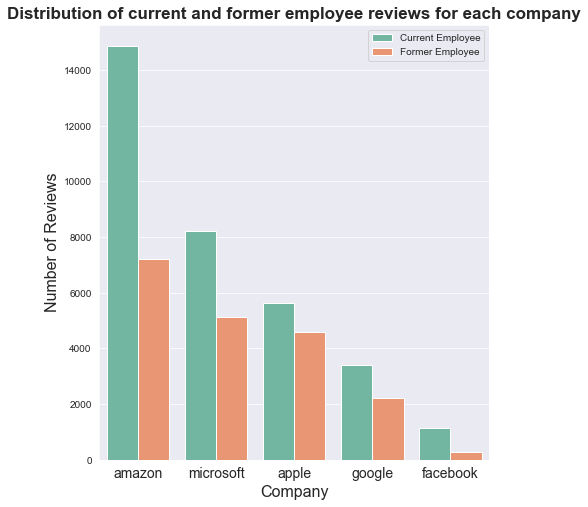

In [43]:

graphCurrentFormerPerCompany = sns.barplot(x="company",
                                           y="number_of_reviews",
                                           hue="EmployeeType",
                                           data=reviewsCurrentFormerForCompany,
                                           ci=None,
                                           palette="Set2")

configureGraph(
    graphCurrentFormerPerCompany, plt, "Company", 16, "Number of Reviews", 16,
    False,
    "Distribution of current and former employee reviews for each company", 17)

plt.xticks(fontsize=14)

#graphCurrentFormerPerCompany.set_xticklabels(
#graphCurrentFormerPerCompany.get_xticklabels(), rotation=90)

labels = ['Current Employee', 'Former Employee']
graphCurrentFormerPerCompany.legend(loc='upper right', labels=labels)
plt.show()

In [44]:
# Average overall reviews per company by former and current employee

averageOverallRatingCurrentFormer = dataFrameReviews.groupby(
    ["company",
     "EmployeeType"])["overall-ratings"].mean().reset_index().rename(
         columns={0: "number_of_reviews"})

averageOverallRatingCurrentFormer.rename(
    columns={"overall-ratings": "average_overall_ratings"}, inplace=True)

averageOverallRatingCurrentFormer.sort_values(by="average_overall_ratings",
                                              ascending=False,
                                              inplace=True)

averageOverallRatingCurrentFormer

,company,EmployeeType,average_overall_ratings
4,facebook,Current Employee,4.672145
6,google,Current Employee,4.461924
7,google,Former Employee,4.250903
2,apple,Current Employee,4.063031
8,microsoft,Current Employee,3.981644
5,facebook,Former Employee,3.886525
3,apple,Former Employee,3.831050
0,amazon,Current Employee,3.821635
9,microsoft,Former Employee,3.664848
1,amazon,Former Employee,3.159634


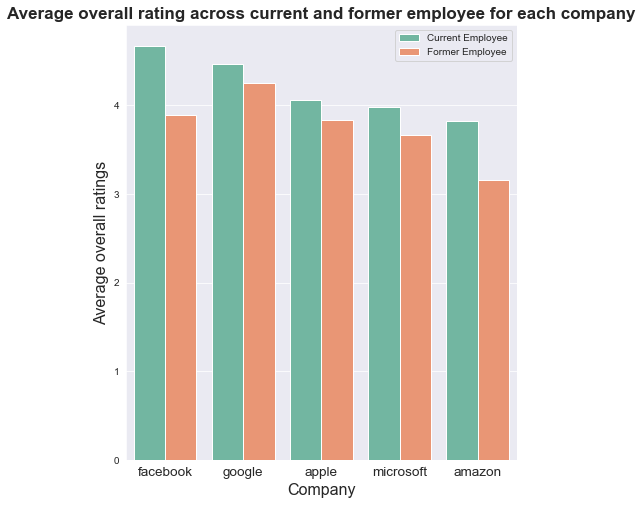

In [45]:
graphAverageOverallRatingCurrentFormer = sns.barplot(
    x="company",
    y="average_overall_ratings",
    hue="EmployeeType",
    data=averageOverallRatingCurrentFormer,
    ci=None,
    palette="Set2")

configureGraph(
    graphAverageOverallRatingCurrentFormer, plt, "Company", 16,
    "Average overall ratings", 16, False,
    "Average overall rating across current and former employee for each company", 17)

plt.rcParams['figure.figsize'] = (11,9)

plt.xticks(fontsize=13.5)

#graphCurrentFormerPerCompany.set_xticklabels(
#graphCurrentFormerPerCompany.get_xticklabels(), rotation=90)

labels = ['Current Employee', 'Former Employee']
graphAverageOverallRatingCurrentFormer.legend(loc='upper right', labels=labels)
plt.show()

In [46]:
# Average rating of each category for all companies
# ratings_comp = dataFrameReviews[[
#     "company", "work-balance-stars", "culture-values-stars",
#     "carrer-opportunities-stars", "comp-benefit-stars",
#     "senior-mangemnet-stars"
# ]]


# ratings_comp[[
#     "work-balance-stars", "culture-values-stars", "carrer-opportunities-stars",
#     "comp-benefit-stars", "senior-mangemnet-stars"
# ]] = ratings_comp[[
#     "work-balance-stars", "culture-values-stars", "carrer-opportunities-stars",
#     "comp-benefit-stars", "senior-mangemnet-stars"
# ]].apply(pd.to_numeric)

averageRatingsEachCategory = dataFrameReviews.groupby("company")["work-balance-stars",
                                        "culture-values-stars",
                                        "carrer-opportunities-stars",
                                        "comp-benefit-stars",
                                        "senior-mangemnet-stars"].mean().reset_index()

averageRatingsEachCategory

<ipython-input-46-713f7d6bf836>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averageRatingsEachCategory = dataFrameReviews.groupby("company")["work-balance-stars",


,company,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
0,amazon,3.010871,3.532204,3.621161,3.710753,3.171755
1,apple,3.338050,4.097882,3.419342,4.058944,3.446960
2,facebook,3.904729,4.515299,4.365090,4.573018,4.260779
3,google,4.004104,4.359208,4.030692,4.427552,3.871877
4,microsoft,3.575086,3.657359,3.710211,4.025453,3.185432


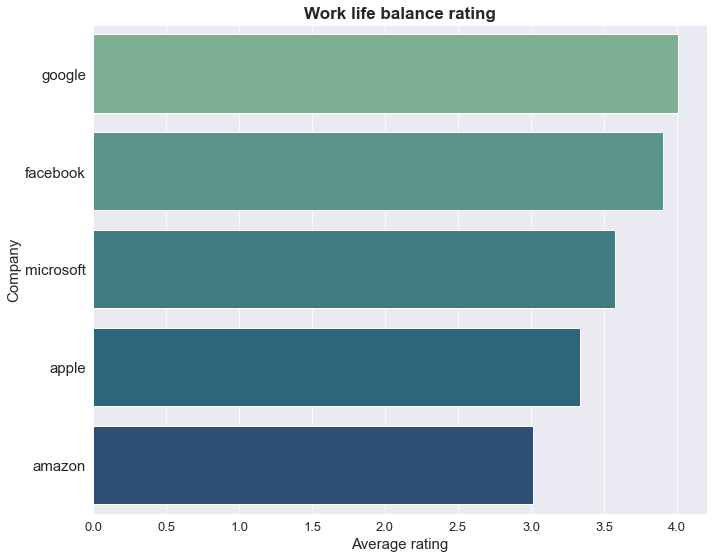

In [47]:
#Work life balance average rating
averageRatingsEachCategory.sort_values(by="work-balance-stars",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingCategories = sns.barplot(x="work-balance-stars",
                                           y="company",
                                           data=averageRatingsEachCategory,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingCategories, plt, "Average rating", 15,
               "Company", 15, False,
               "Work life balance rating", 17)

plt.rcParams['figure.figsize'] = (3, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

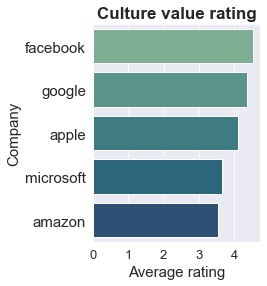

In [48]:
# Culture value average rating

averageRatingsEachCategory.sort_values(by="culture-values-stars",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingCategories = sns.barplot(x="culture-values-stars",
                                           y="company",
                                           data=averageRatingsEachCategory,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingCategories, plt, "Average rating", 15,
               "Company", 15, False,
               "Culture value rating", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

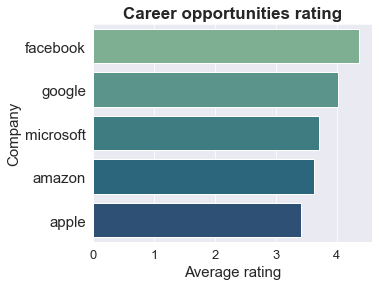

In [49]:
#Career opportunities average rating

averageRatingsEachCategory.sort_values(by="carrer-opportunities-stars",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingCategories = sns.barplot(x="carrer-opportunities-stars",
                                           y="company",
                                           data=averageRatingsEachCategory,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingCategories, plt, "Average rating", 15,
               "Company", 15, False,
               "Career opportunities rating", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

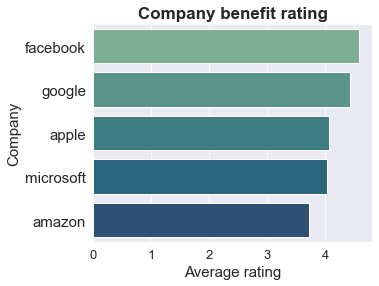

In [50]:
# Company benefits average rating

averageRatingsEachCategory.sort_values(by="comp-benefit-stars",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingCategories = sns.barplot(x="comp-benefit-stars",
                                           y="company",
                                           data=averageRatingsEachCategory,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingCategories, plt, "Average rating", 15,
               "Company", 15, False,
               "Company benefit rating", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

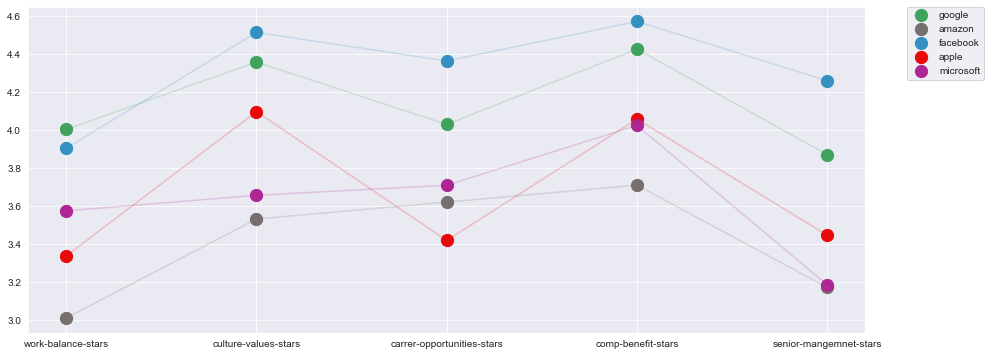

In [122]:
features = [
    'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars',
    'comp-benefit-stars', 'senior-mangemnet-stars'
]
index_companies = ['google', 'amazon', 'facebook', 'apple', 'microsoft']

mean_rating_df = pd.DataFrame(index=index_companies)

for feature in features:
    f = []
    for comp in index_companies:
        f.append(
            np.mean(averageRatingsEachCategory[feature][
                averageRatingsEachCategory['company'] == comp]))
    mean_rating_df[feature] = f
del f

plt.figure(1, figsize=(15, 6))
colors = ['#3fa35d', '#776e6e', '#3490c1', '#e80909', '#ad2694', '#ede62f']
for n, c in zip(range(5), colors):
    plt.scatter(x=np.arange(5),
                y=mean_rating_df.iloc[n, :].values,
                s=150,
                c=c,
                label=mean_rating_df.index[n])
    
    plt.plot(np.arange(5),
             mean_rating_df.iloc[n, :].values,
             '-',
             color=c,
             alpha=0.2)
    plt.xticks(np.arange(5), features)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

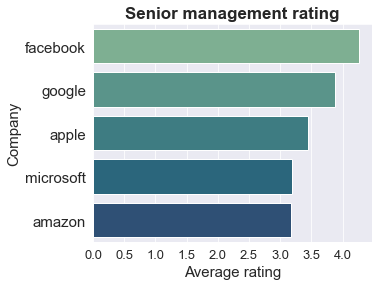

In [51]:

#Senior management average rating

averageRatingsEachCategory.sort_values(by="senior-mangemnet-stars",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingCategories = sns.barplot(x="senior-mangemnet-stars",
                                           y="company",
                                           data=averageRatingsEachCategory,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingCategories, plt, "Average rating", 15,
               "Company", 15, False,
               "Senior management rating", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

In [52]:
dataFrameReviews.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'Year', 'Month', 'EmployeeType', 'FunctionHR',
       'FunctionRecruiter', 'FunctionSDevelopment', 'FunctionFinance',
       'FunctionMarketing', 'FunctionAnalyst', 'RoleLead', 'RoleSenior',
       'RoleManager', 'RoleIntern'],
      dtype='object')

In [53]:
# Finance function overall ratings average for each company

conditionFinanceReview = dataFrameReviews['FunctionFinance'] != 0

dataFrameFinance = dataFrameReviews[conditionFinanceReview]

dataFrameFinance

averageOverAllRatingFinance = dataFrameFinance.groupby(
    "company")['overall-ratings'].mean().reset_index()

averageOverAllRatingFinance

,company,overall-ratings
0,amazon,3.800926
1,apple,3.825000
2,facebook,4.333333
3,google,4.285714
4,microsoft,3.878049


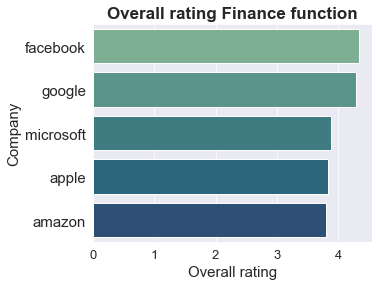

In [54]:

averageOverAllRatingFinance.sort_values(by="overall-ratings",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingFinance = sns.barplot(x="overall-ratings",
                                           y="company",
                                           data=averageOverAllRatingFinance,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingFinance, plt, "Overall rating", 15,
               "Company", 15, False,
               "Overall rating Finance function", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

In [55]:
#Function Software development
conditionSDevelopmentReview = dataFrameReviews['FunctionSDevelopment'] != 0

dataFrameSdevelopment = dataFrameReviews[conditionSDevelopmentReview]

dataFrameFinance

averageOverAllRatingSdevelopment = dataFrameSdevelopment.groupby(
    "company")['overall-ratings'].mean().reset_index()

averageOverAllRatingSdevelopment


,company,overall-ratings
0,amazon,3.704384
1,apple,3.851064
2,facebook,4.613527
3,google,4.478028
4,microsoft,3.850740


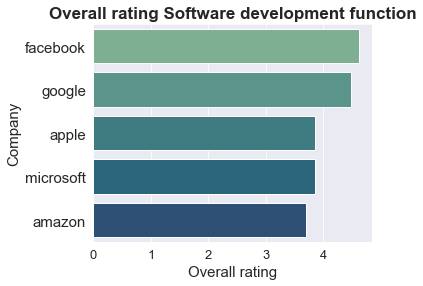

In [56]:
averageOverAllRatingSdevelopment.sort_values(by="overall-ratings",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingSdevelopment = sns.barplot(x="overall-ratings",
                                           y="company",
                                           data=averageOverAllRatingSdevelopment,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingSdevelopment, plt, "Overall rating", 15,
               "Company", 15, False,
               "Overall rating Software development function", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

In [57]:
# Function Marketing

conditionMarketingReview = dataFrameReviews['FunctionMarketing'] != 0

dataFrameMarketing = dataFrameReviews[conditionMarketingReview]

dataFrameMarketing

averageOverAllRatingMarketing = dataFrameMarketing.groupby(
    "company")['overall-ratings'].mean().reset_index()

averageOverAllRatingMarketing

,company,overall-ratings
0,amazon,3.647541
1,apple,3.939394
2,facebook,4.656250
3,google,4.214286
4,microsoft,3.715569


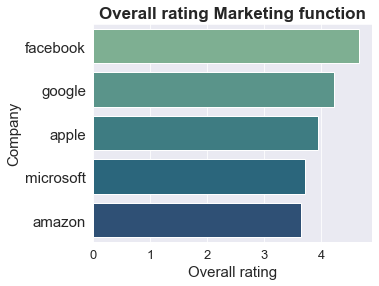

In [58]:
averageOverAllRatingMarketing.sort_values(by="overall-ratings",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingMarketing = sns.barplot(x="overall-ratings",
                                           y="company",
                                           data=averageOverAllRatingMarketing,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingMarketing, plt, "Overall rating", 15,
               "Company", 15, False,
               "Overall rating Marketing function", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

### Roles

In [59]:
# Intern position reviews
conditionInternPositionReview = dataFrameReviews['RoleIntern'] != 0

dataFrameIntern = dataFrameReviews[conditionInternPositionReview]

dataFrameIntern

averageOverAllRatingIntern = dataFrameIntern.groupby(
    "company")['overall-ratings'].mean().reset_index()

averageOverAllRatingIntern

,company,overall-ratings
0,amazon,3.756098
1,apple,4.021505
2,facebook,4.576923
3,google,4.625899
4,microsoft,4.143646


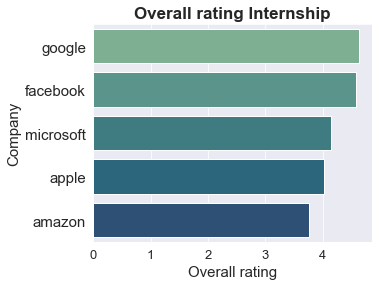

In [60]:
averageOverAllRatingIntern.sort_values(by="overall-ratings",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingIntern = sns.barplot(x="overall-ratings",
                                           y="company",
                                           data=averageOverAllRatingIntern,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingIntern, plt, "Overall rating", 15,
               "Company", 15, False,
               "Overall rating Internship", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

In [61]:
# Lead average rating

conditionLeadPositionReview = dataFrameReviews['RoleLead'] != 0

dataFrameLeadReviews = dataFrameReviews[conditionLeadPositionReview]

dataFrameLeadReviews

averageOverAllRatingLeadPosition = dataFrameLeadReviews.groupby(
    "company")['overall-ratings'].mean().reset_index()

averageOverAllRatingLeadPosition

,company,overall-ratings
0,amazon,4.132479
1,apple,3.842593
2,facebook,4.882353
3,google,4.338983
4,microsoft,3.913621


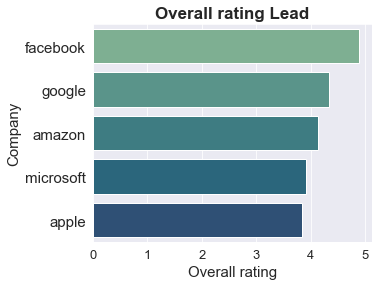

In [62]:
averageOverAllRatingLeadPosition.sort_values(by="overall-ratings",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingLead = sns.barplot(x="overall-ratings",
                                           y="company",
                                           data=averageOverAllRatingLeadPosition,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingLead, plt, "Overall rating", 15,
               "Company", 15, False,
               "Overall rating Lead", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

In [63]:
conditionManagerPositionReview = dataFrameReviews['RoleManager'] != 0

dataFrameManagerReviews = dataFrameReviews[conditionManagerPositionReview]

dataFrameManagerReviews

averageOverAllRatingManagerPosition = dataFrameManagerReviews.groupby(
    "company")['overall-ratings'].mean().reset_index()

averageOverAllRatingManagerPosition

,company,overall-ratings
0,amazon,3.739897
1,apple,3.848030
2,facebook,4.527778
3,google,4.384840
4,microsoft,3.804745


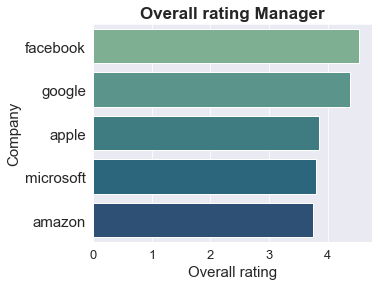

In [64]:
averageOverAllRatingManagerPosition.sort_values(by="overall-ratings",
                                       ascending=False,
                                       inplace=True)

graphAverageRatingManager = sns.barplot(x="overall-ratings",
                                           y="company",
                                           data=averageOverAllRatingManagerPosition,
                                           ci=None,
                                           palette="crest")

configureGraph(graphAverageRatingManager, plt, "Overall rating", 15,
               "Company", 15, False,
               "Overall rating Manager", 17)

plt.rcParams['figure.figsize'] = (5, 4)

plt.yticks(fontsize=15)
plt.xticks(fontsize = 13)

plt.show()

In [65]:
dataFrameReviews.groupby("company")["overall-ratings"].mean().reset_index()

,company,overall-ratings
0,amazon,3.605626
1,apple,3.958915
2,facebook,4.518081
3,google,4.378480
4,microsoft,3.859934


In [66]:

#Sentiment for advice to management

#Filtering out those which dont have none in advice column

conditionMgmtAdvice = df['advice-to-mgmt'] != 'none'

dataFrameAdvice = df[conditionMgmtAdvice]

dataFrameAdvice.shape

def getdummyValue():
    return "dummy"

dataFrameAdviceNew = pd.DataFrame()
dataFrameAdviceNew.loc[:,"NewColumn"] = dataFrameAdvice["advice-to-mgmt"].apply(lambda x: getdummyValue())

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.01 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= 0.01 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return overall_sentiment


#dataFrameAdvice["Sent"] = dataFrameAdvice["advice-to-mgmt"].apply(lambda x: sentiment_vader(x))

In [68]:
dataFrameAdvice.head(5)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,...,FunctionHR,FunctionRecruiter,FunctionSDevelopment,FunctionFinance,FunctionMarketing,FunctionAnalyst,RoleLead,RoleSenior,RoleManager,RoleIntern
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,...,0,0,0,0,0,0,0,0,1,0
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,...,0,0,1,0,0,0,0,0,0,0
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,...,0,0,0,0,0,0,0,0,0,0
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,...,0,0,1,0,0,0,0,0,0,0
24,google,"Los Angeles, CA","Nov 29, 2018",Current Employee - Staff Accountant,Accountant,I like and learned from the beginning accounting,High clerical work in the Sane record,Management and Finance must be close relation ...,5,5,...,0,0,0,0,0,0,0,0,0,0


In [88]:
dataFrameOverallReview = dataFrameReviews[[
    'company',
    'location',
    'Year',
    'Month',
    'EmployeeType',
    'FunctionHR',
    'FunctionSDevelopment',
    'FunctionFinance',
    'FunctionMarketing',
    'RoleLead',
    'RoleSenior',
    'RoleManager',
    'RoleIntern',
    'summary',
    'pros',
    'cons',
    'advice-to-mgmt',
]].copy()

dataFrameOverallReview.head()

dataFrameOverallReview.isna().sum()

dataFrameOverallReview.fillna(value="", inplace=True)

dataFrameOverallReview.isna().sum()

company                 0
location                0
Year                    0
Month                   0
EmployeeType            0
FunctionHR              0
FunctionSDevelopment    0
FunctionFinance         0
FunctionMarketing       0
RoleLead                0
RoleSenior              0
RoleManager             0
RoleIntern              0
summary                 0
pros                    0
cons                    0
advice-to-mgmt          0
dtype: int64

In [89]:
def combineReview(summary, pros, cons):
    return summary + " " + pros + " " + cons


dataFrameOverallReview["ReviewCombined"] = dataFrameOverallReview[["summary", "pros", "cons"]].apply(
        lambda x: " ".join(x), axis=1)

dataFrameOverallReview.head()



,company,location,Year,Month,EmployeeType,FunctionHR,FunctionSDevelopment,FunctionFinance,FunctionMarketing,RoleLead,RoleSenior,RoleManager,RoleIntern,summary,pros,cons,advice-to-mgmt,ReviewCombined
0,google,none,2018,Dec,Current Employee,0,0,0,0,0,0,0,0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,Best Company to work for People are smart and ...
1,google,"Mountain View, CA",2013,Jun,Former Employee,0,0,0,0,0,0,1,0,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,"Moving at the speed of light, burn out is inev..."
2,google,"New York, NY",2014,May,Current Employee,0,1,0,0,0,0,0,0,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,Great balance between big-company security and...
3,google,"Mountain View, CA",2015,Feb,Current Employee,0,0,0,0,0,0,0,0,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,The best place I've worked and also the most d...
4,google,"Los Angeles, CA",2018,Jul,Former Employee,0,1,0,0,0,0,0,0,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,"Unique, one of a kind dream job Google is a wo..."


In [90]:
dataFrameOverallReview["Senti"] = dataFrameOverallReview["ReviewCombined"].apply(lambda x: sentiment_vader(x))

In [91]:
dataFrameOverallReview.head()

,company,location,Year,Month,EmployeeType,FunctionHR,FunctionSDevelopment,FunctionFinance,FunctionMarketing,RoleLead,RoleSenior,RoleManager,RoleIntern,summary,pros,cons,advice-to-mgmt,ReviewCombined,Senti
0,google,none,2018,Dec,Current Employee,0,0,0,0,0,0,0,0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,Best Company to work for People are smart and ...,Positive
1,google,"Mountain View, CA",2013,Jun,Former Employee,0,0,0,0,0,0,1,0,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,"Moving at the speed of light, burn out is inev...",Positive
2,google,"New York, NY",2014,May,Current Employee,0,1,0,0,0,0,0,0,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,Great balance between big-company security and...,Positive
3,google,"Mountain View, CA",2015,Feb,Current Employee,0,0,0,0,0,0,0,0,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,The best place I've worked and also the most d...,Positive
4,google,"Los Angeles, CA",2018,Jul,Former Employee,0,1,0,0,0,0,0,0,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,"Unique, one of a kind dream job Google is a wo...",Positive


In [87]:
dataFrameOverallReview.Senti.value_counts(normalize= True)

Positive    0.88643
Negative    0.11357
Name: Senti, dtype: float64

In [93]:
dataFrameOverallReview["ManagementSentiment"] = dataFrameOverallReview[
    'advice-to-mgmt'].apply(lambda x: sentiment_vader(x))

KeyboardInterrupt: 

In [94]:
dataFrameOverallReview.ManagementSentiment.value_counts()

Negative    34656
Positive    18069
Name: ManagementSentiment, dtype: int64

In [95]:
dataFrameOverallReview.head(4)

,company,location,Year,Month,EmployeeType,FunctionHR,FunctionSDevelopment,FunctionFinance,FunctionMarketing,RoleLead,RoleSenior,RoleManager,RoleIntern,summary,pros,cons,advice-to-mgmt,ReviewCombined,Senti,ManagementSentiment
0,google,none,2018,Dec,Current Employee,0,0,0,0,0,0,0,0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,Best Company to work for People are smart and ...,Positive,Negative
1,google,"Mountain View, CA",2013,Jun,Former Employee,0,0,0,0,0,0,1,0,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,"Moving at the speed of light, burn out is inev...",Positive,Positive
2,google,"New York, NY",2014,May,Current Employee,0,1,0,0,0,0,0,0,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,Great balance between big-company security and...,Positive,Negative
3,google,"Mountain View, CA",2015,Feb,Current Employee,0,0,0,0,0,0,0,0,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,The best place I've worked and also the most d...,Positive,Positive


In [80]:
dataFrameOverallReview['advice-to-mgmt'].value_counts(normalize= True)

none                                                                                                                                                                                                                                                                                                     0.425244
None                                                                                                                                                                                                                                                                                                     0.005386
                                                                                                                                                                                                                                                                                                         0.004400
Keep up the good work                                                             

In [96]:
dataFrameOverallReview.to_csv(r'/Users/rakshith/employee_reviews_labelled.csv')

In [126]:
dataFrameOverallReview['location'].value_counts()

none                              17355
Seattle, WA                        4074
Redmond, WA                        3939
Hyderabad (India)                  1953
Bengaluru (India)                  1506
                                  ...  
Independence, MO                      1
San José, Heredia (Costa Rica)        1
Atherton, CA                          1
Greenwood, IN                         1
Cumming, GA                           1
Name: location, Length: 1925, dtype: int64

#### Location data, with none removed

In [127]:
conditionNone = dataFrameOverallReview['location'] != 'none'

dataFrameLocationFilteredData = dataFrameOverallReview[conditionNone]

dataFrameLocationFilteredData.to_csv(r'/Users/rakshith/LocationDataForReviews.csv')

In [131]:
dataFrameOverallReview.shape

(52725, 20)